In [37]:
import sys
try:
    sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
except:
    pass
import cv2
import tensorflow as tf
import pandas as pd
import numpy as np
N_CLASS = 6

In [45]:
ld = "training/simplified_training/"
X_train = []
for i in range(1, 5001):
    im = cv2.imread(ld+str(i)+".png", 0)
    X_train.append(im.reshape(1,200,200))
X_train = np.array(X_train)
Y_df = pd.read_csv("training/solution.csv")
Y_df = Y_df.values[:,1]
Y_train = np.zeros((len(X_train), N_CLASS))
Y_train[np.arange(len(X_train)), Y_df-1] = 1

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_image(x):
    plt.imshow(x)

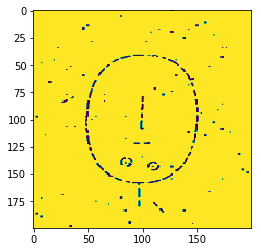

In [47]:
show_image(X_train[0][0])

In [48]:
nsamples = 1000
X_train = X_train[:nsamples]
Y_train = Y_train[:nsamples]
X_train.shape

(1000, 1, 200, 200)

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
X_train = X_train.astype('float32')
X_train /= 255
batch_size = 64
num_classes = N_CLASS
epochs = 12
input_shape = X_train[0].shape
print("input_shape = ", input_shape)
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, data_format='channels_first'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASS, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

input_shape =  (1, 200, 200)
Epoch 1/12
1000/1000 [==============================] - 324s 324ms/step - loss: 1.7925 - acc: 0.1510
Epoch 2/12
1000/1000 [==============================] - 350s 350ms/step - loss: 1.7912 - acc: 0.1760
Epoch 3/12
 128/1000 [==>...........................] - ETA: 4:48 - loss: 1.7889 - acc: 0.1719

In [61]:
model.save("my_model.h5")
print(model.predict(X_train[:10]))
print(Y_train[:10])

[[0.17342898 0.14796221 0.16918519 0.17798232 0.1716866  0.15975465]
 [0.17342898 0.14796221 0.16918519 0.17798232 0.1716866  0.15975465]
 [0.17342898 0.14796221 0.16918519 0.17798232 0.1716866  0.15975465]
 [0.17342898 0.14796221 0.16918519 0.17798232 0.1716866  0.15975465]
 [0.17342898 0.14796221 0.16918519 0.17798232 0.1716866  0.15975465]
 [0.17342898 0.14796221 0.16918519 0.17798232 0.1716866  0.15975465]
 [0.17342898 0.14796221 0.16918519 0.17798232 0.1716866  0.15975465]
 [0.17342898 0.14796221 0.16918519 0.17798232 0.1716866  0.15975465]
 [0.17342898 0.14796221 0.16918519 0.17798232 0.1716866  0.15975465]
 [0.17342898 0.14796221 0.16918519 0.17798232 0.1716866  0.15975465]]
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
